In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Housing_Price_Data.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.sample()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
223,4760000,6321,3,1,2,yes,no,yes,no,yes,1,no,furnished


In [4]:
df["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

categorical_columns = ["furnishingstatus", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning",
                              "prefarea"]

ordinal_encoder = OrdinalEncoder(categories = [["unfurnished", "semi-furnished", "furnished"],
            ["no", "yes"], ["no", "yes"], ["no", "yes"], ["no", "yes"], ["no", "yes"], ["no", "yes"]])

transformer = ColumnTransformer(transformers = [
    ("tnf1", ordinal_encoder, categorical_columns)
], remainder = "passthrough"
)

df_transformed_categorical = transformer.fit_transform(df[categorical_columns])

df_transformed_categorical.shape

df_transformed_categorical = pd.DataFrame(df_transformed_categorical, columns = categorical_columns)
df_transformed_categorical

numeric_data = df.select_dtypes(include = ["int64", "float64"])
numeric_cols = list(numeric_data.columns)

In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

numeric_cols

df_transformed = pd.concat([numeric_data, df_transformed_categorical], axis = 1)

df = df_transformed

x = df.drop(columns = ["price"], axis = 1)
y = df['price']

In [6]:
df.columns[6]

'guestroom'

## Categorical values counts

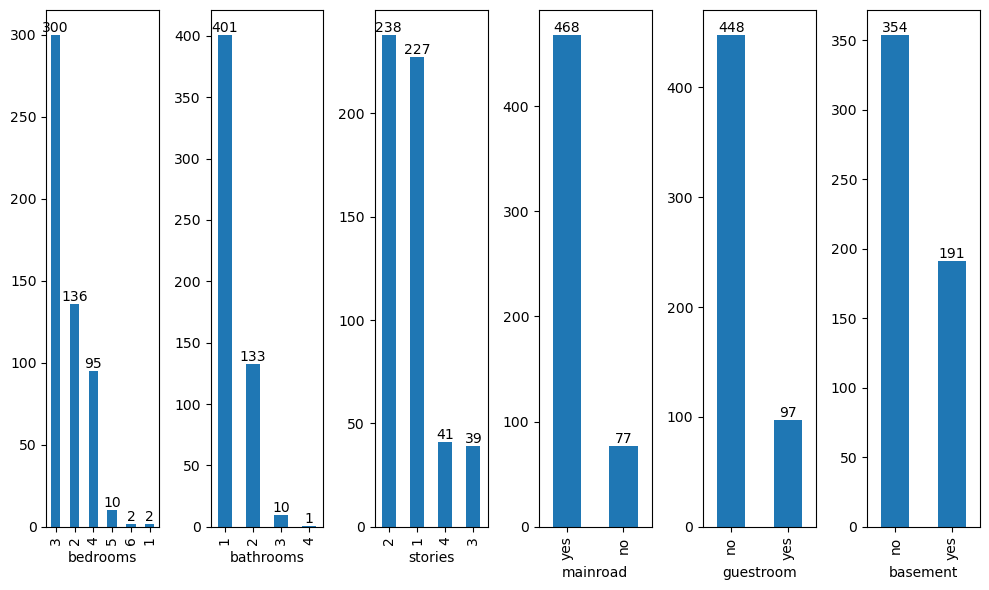

<BarContainer object of 2 artists>


In [7]:
fig, axis = plt.subplots(nrows = 1, ncols = 6, figsize = (10, 6))
index = 2
containers = []
for i in range(6):
    counts = df[df.columns[index]].value_counts()
    counts.plot(kind = "bar", ax = axis[i])
    for container in axis[i].containers:
        axis[i].bar_label(container)
    index += 1
    
plt.tight_layout()
plt.show()
print(container)

In the provided code snippet:

```python
for container in axes[i].containers:
    axes[i].bar_label(container)
```

This part of the code is iterating over the containers of each bar in the bar plot and labeling each bar with its corresponding value.

Here's a breakdown of what each line does:

- `axes[i].containers`: This accesses the containers (in this case, the bars) of the `i`-th subplot.
- `for container in axes[i].containers`: This iterates over each container (bar) in the subplot.
- `axes[i].bar_label(container)`: This labels each bar with its corresponding value. The `bar_label` function is used to add labels to the bars of the plot. It automatically adds labels with the height of each bar by default.

Overall, these lines ensure that each bar in the bar plot is labeled with its corresponding value.

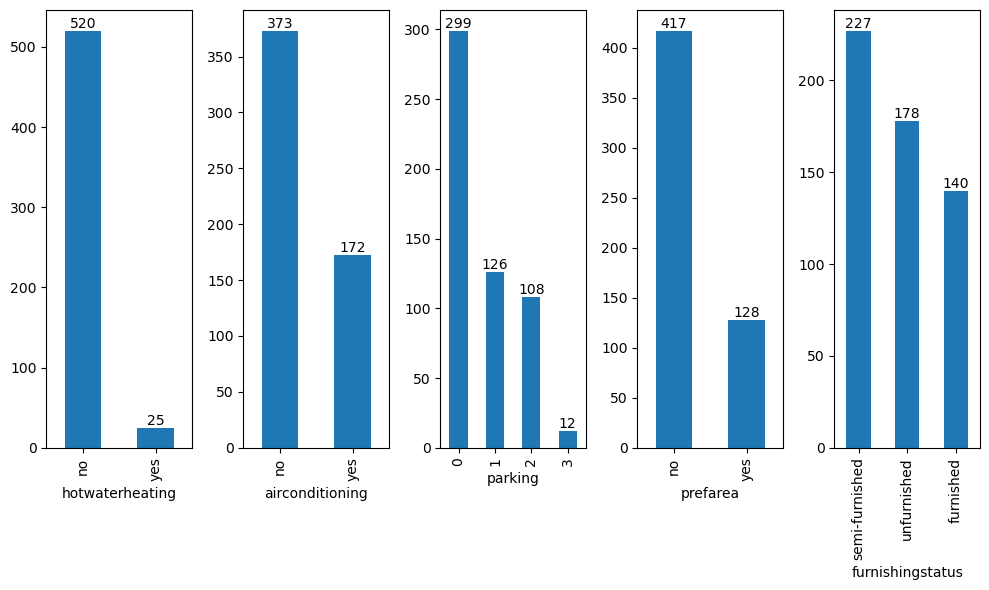

In [8]:
fig, axis = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 6))
for i in range(5):
    counts = df[df.columns[index]].value_counts()
    counts.plot(kind = "bar", ax = axis[i])
    for container in axis[i].containers:
        axis[i].bar_label(container)
    index += 1

plt.tight_layout()
plt.show()

In [9]:
df[df.columns[2]].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

## Area vs price and density distributions overall

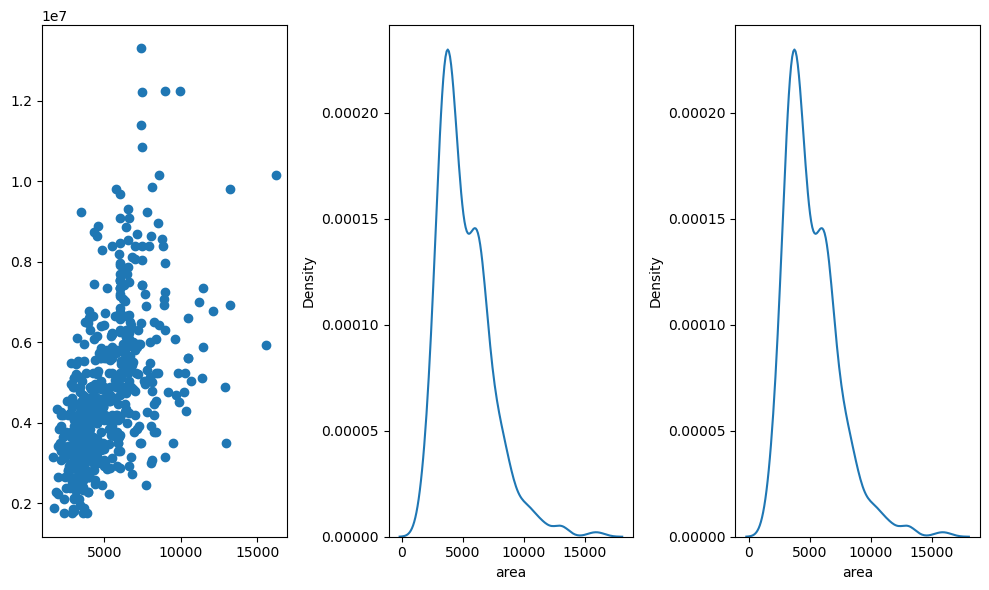

In [10]:
fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 6))
axis[0].scatter(df["area"], df["price"])
sns.kdeplot(df, x = "area", ax = axis[1])
sns.kdeplot(df, x = "area", ax = axis[2])
plt.tight_layout()
plt.show()

The `sns.kdeplot` function in Seaborn is used to plot univariate or bivariate kernel density estimates. Kernel density estimation is a non-parametric method to estimate the probability density function of a random variable. It provides a smooth estimate of the probability density function based on the observed data points.

Here's how the `sns.kdeplot` function works:

1. **Univariate KDE Plot**: If you pass a single variable to the `data` parameter, it will create a univariate KDE plot, estimating the density of values along a single axis.

2. **Bivariate KDE Plot**: If you pass two variables to the `x` and `y` parameters, it will create a bivariate KDE plot, estimating the joint density of values along two axes.

3. **Kernel Function**: KDE plots use a kernel function to estimate the density at each point. The kernel function specifies the shape of the distribution at each data point. Common kernel functions include Gaussian (normal) and Epanechnikov kernels.

4. **Bandwidth**: The bandwidth parameter controls the smoothness of the estimated density function. Higher bandwidths result in smoother density estimates, while lower bandwidths capture more detailed variations in the data.

5. **Shading**: By default, KDE plots shade the area under the curve to represent the estimated density. This shading helps visualize regions of higher and lower density.

Overall, `sns.kdeplot` is a useful tool for visualizing the distribution of data and identifying patterns or trends in the data.


## Boxplots to detect outliers

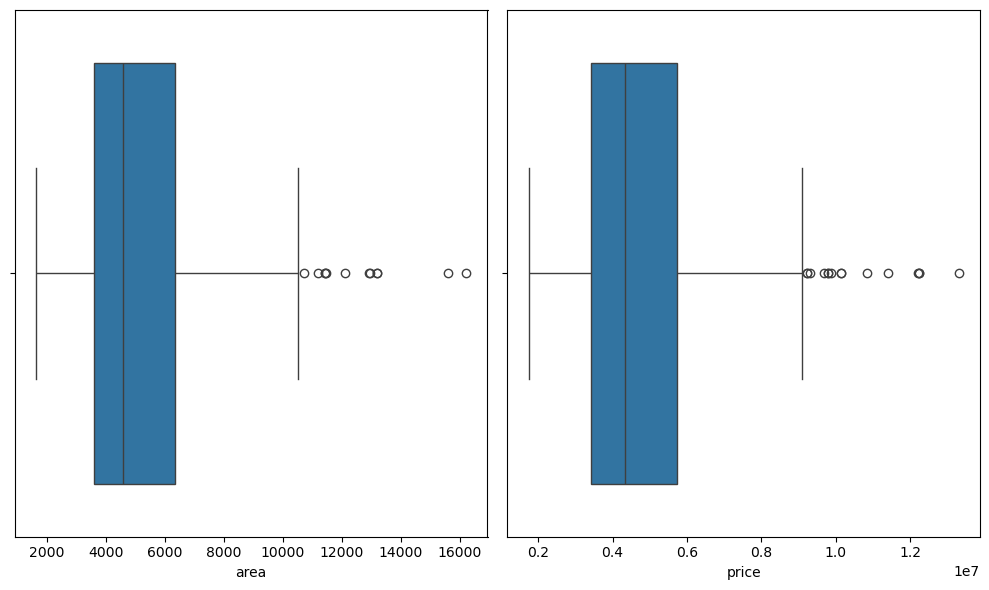

In [11]:
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))
sns.boxplot(df, x = "area", ax = axis[0])
sns.boxplot(df, x = "price", ax = axis[1])
plt.tight_layout()
plt.show()

## Mean prices per each value

In [12]:
def plots(df, name, num, ax):
    grouped = df.groupby(name)
    means = grouped[num].mean()
    sns.barplot(x = means.index, y = means, ax = ax)
    for container in ax.containers:
        ax.bar_label(container, label_type = "center", rotation = 90)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [13]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_96540\680256844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_96540\680256844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_96540\3766670485.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x = "price", hue = df.columns[index+1], ax = axis[3])


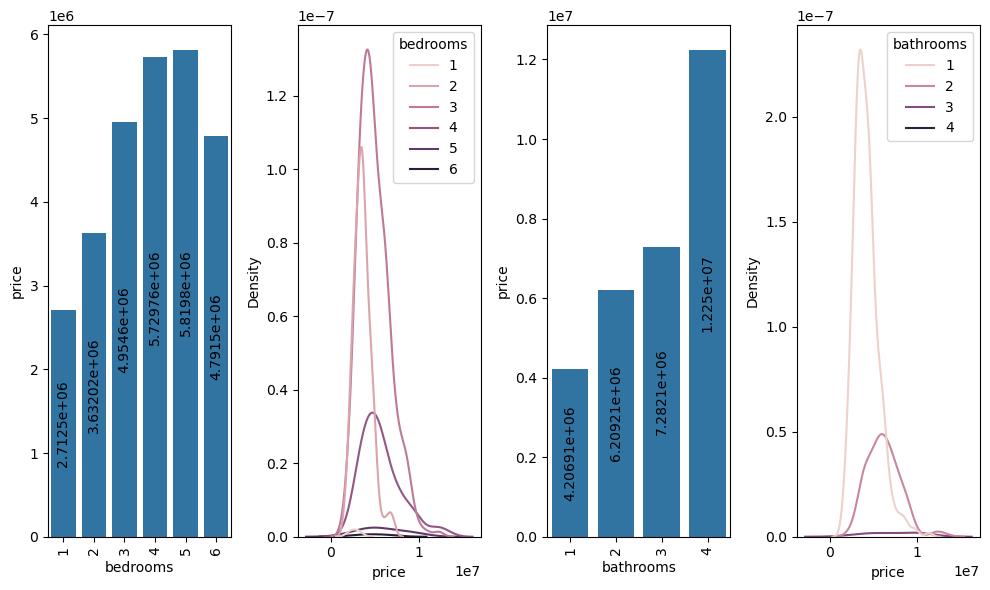

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_96540\680256844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_96540\680256844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


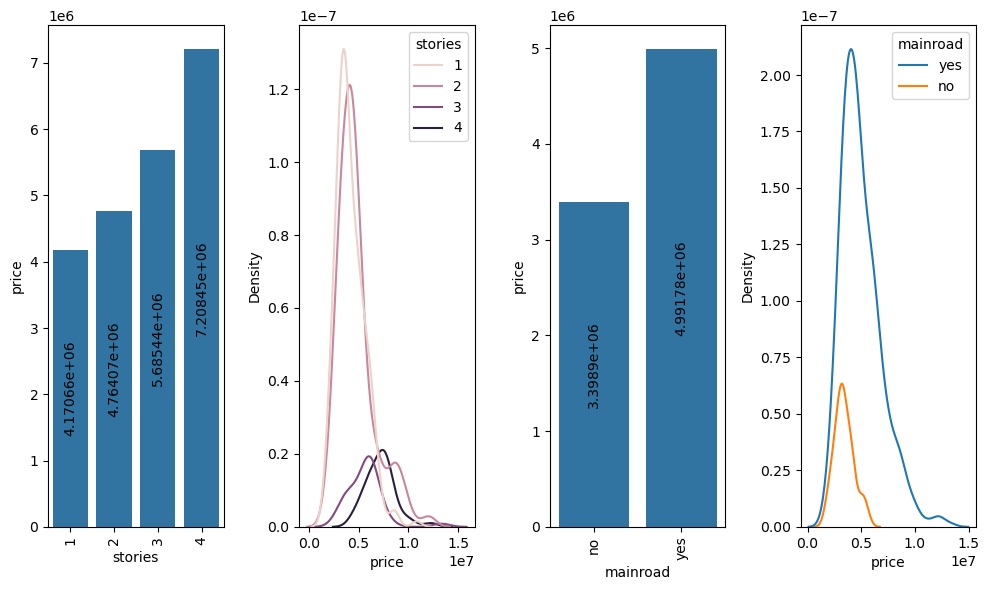

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_96540\680256844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_96540\680256844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


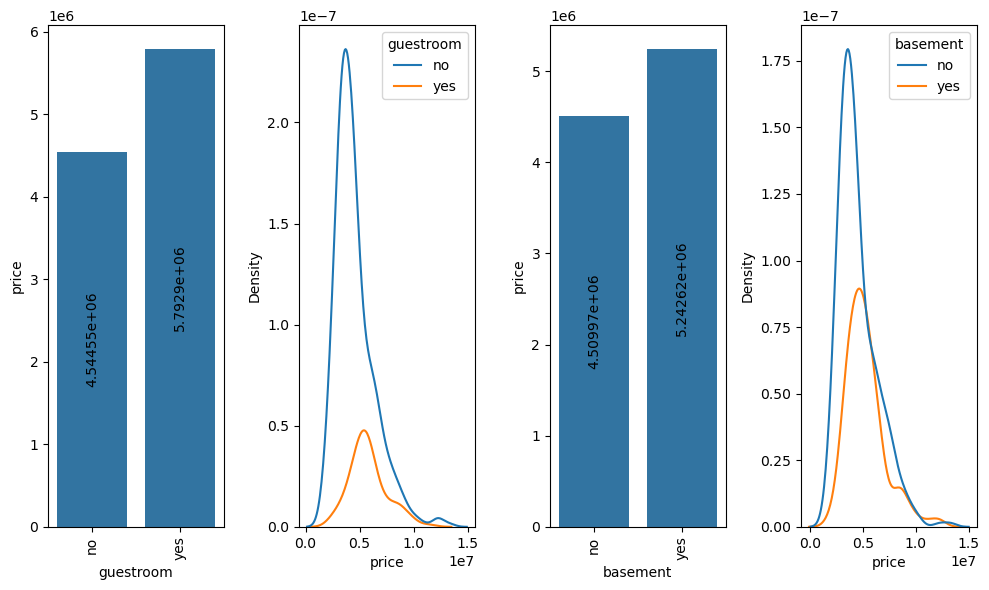

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_96540\680256844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_96540\680256844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


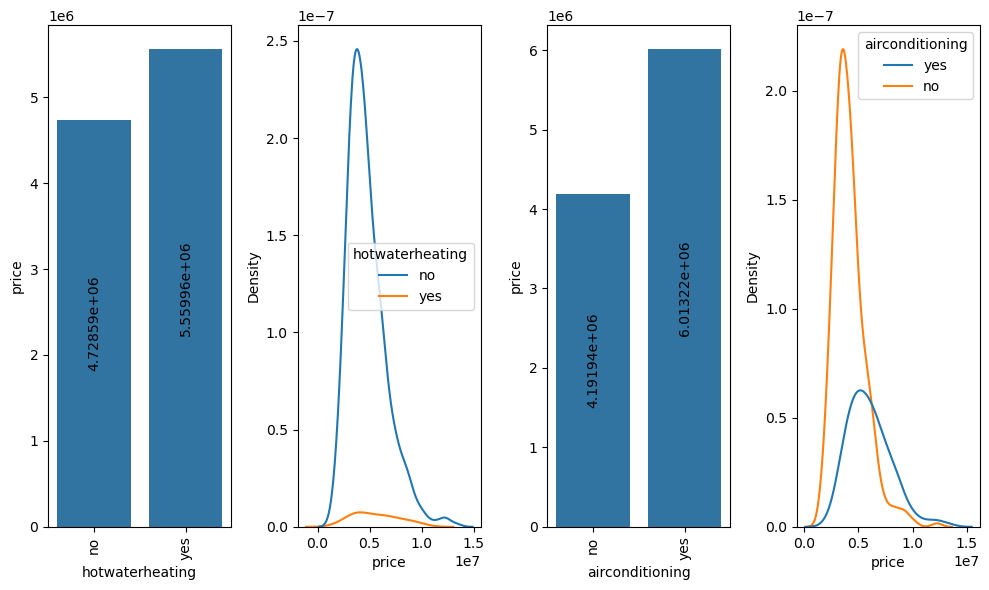

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_96540\680256844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_96540\680256844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


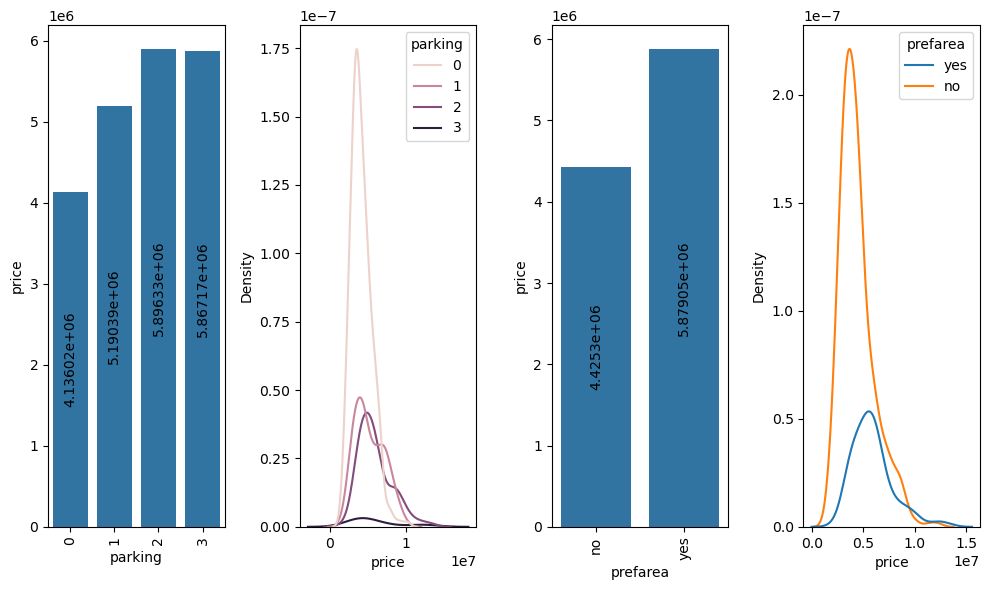

C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_96540\680256844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


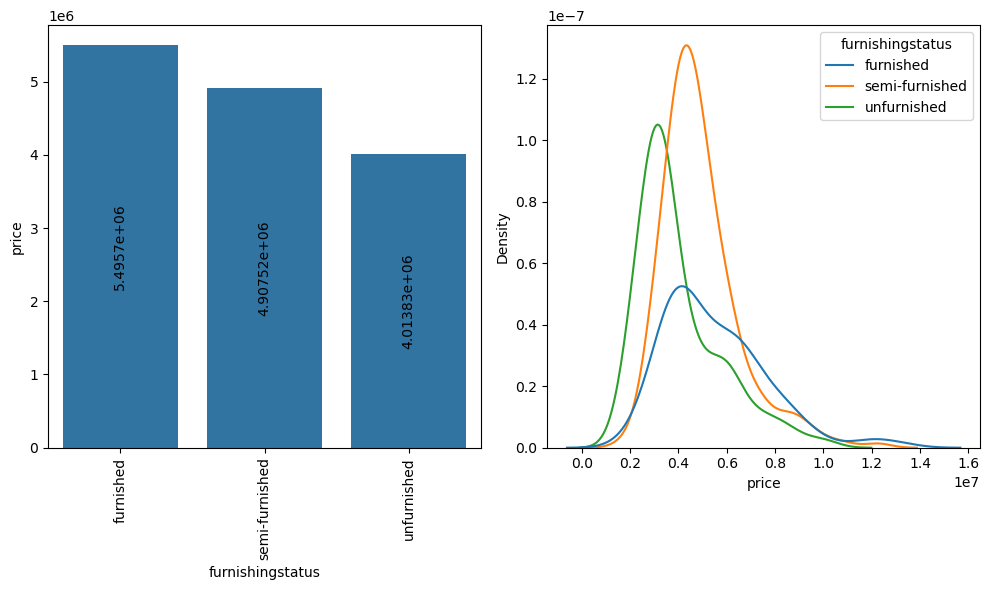

In [14]:
index = 2
for i in range(5):
    fig, axis = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 6))
    plots(df, df.columns[index], "price", axis[0])
    sns.kdeplot(df, x = "price", hue = df.columns[index], ax = axis[1])
    plots(df, df.columns[index+1], "price", axis[2])
    sns.kdeplot(df, x = "price", hue = df.columns[index+1], ax = axis[3])
    plt.tight_layout()
    plt.show()
    index += 2
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))
plots(df, df.columns[index], "price", axis[0])
sns.kdeplot(df, x = "price", hue = df.columns[index], ax = axis[1])
plt.tight_layout()
plt.show()

In [15]:
grouped = df.groupby("bedrooms")
means = grouped["price"].mean()

In [16]:
grouped["price"]

In [17]:
means

bedrooms
1    2.712500e+06
2    3.632022e+06
3    4.954598e+06
4    5.729758e+06
5    5.819800e+06
6    4.791500e+06
Name: price, dtype: float64

In [18]:
grouped.describe()

price                                                               \
          count          mean           std        min        25%        50%   
bedrooms                                                                       
1           2.0  2.712500e+06  6.187184e+05  2275000.0  2493750.0  2712500.0   
2         136.0  3.632022e+06  1.004024e+06  1750000.0  2992500.0  3535000.0   
3         300.0  4.954598e+06  1.747527e+06  1750000.0  3640000.0  4620000.0   
4          95.0  5.729758e+06  2.307740e+06  2100000.0  4095000.0  5250000.0   
5          10.0  5.819800e+06  2.502315e+06  1960000.0  3972500.0  5582500.0   
6           2.0  4.791500e+06  1.826457e+06  3500000.0  4145750.0  4791500.0   

                                  area               ... stories      parking  \
                75%         max  count         mean  ...     75%  max   count   
bedrooms                                             ...                        
1         2931250.0   3150000.0    2.0  3710.000000  ...     1.0  1.0     2.0   
2         4217500.0   7070000.0  136.0  4636.235294  ...     1.0  4.0   136.0   
3         5967500.0  12250000.0  300.0  5226.620000  ...     2.0  4.0   300.0   
4         6912500.0  13300000.0   95.0  5582.063158  ...     2.0  4.0    95.0   
5         7700000.0  10150000.0   10.0  6291.500000  ...     2.0  3.0    10.0   
6         5437250.0   6083000.0    2.0  3950.000000  ...     2.0  2.0     2.0   

                                                         
              mean       std  min   25%  50%   75%  max  
bedrooms                                                 
1         0.000000  0.000000  0.0  0.00  0.0  0.00  0.0  
2         0.492647  0.720044  0.0  0.00  0.0  1.00  3.0  
3         0.723333  0.884721  0.0  0.00  0.0  1.00  3.0  
4         0.915789  0.930147  0.0  0.00  1.0  2.00  3.0  
5         0.600000  0.843274  0.0  0.00  0.0  1.00  2.0  
6         0.500000  0.707107  0.0  0.25  0.5  0.75  1.0  

[6 rows x 40 columns]

In [19]:
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

## Encoding values

In [20]:
cats = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

le = LabelEncoder()

for i in cats:
    df[i] = le.fit_transform(df[i])

In [21]:
df["mainroad"]

0      1
1      1
2      1
3      1
4      1
      ..
540    1
541    0
542    1
543    0
544    1
Name: mainroad, Length: 545, dtype: int32

In [22]:
df.values

array([[13300000,     7420,        4, ...,        2,        1,        0],
       [12250000,     8960,        4, ...,        3,        0,        0],
       [12250000,     9960,        3, ...,        2,        1,        1],
       ...,
       [ 1750000,     3620,        2, ...,        0,        0,        2],
       [ 1750000,     2910,        3, ...,        0,        0,        0],
       [ 1750000,     3850,        3, ...,        0,        0,        2]],
      dtype=int64)

The `df.values` attribute in pandas DataFrame returns a NumPy array representing the data stored in the DataFrame. Each row of the DataFrame is converted into an array, and the entire DataFrame is represented as a 2-dimensional NumPy array.

Here's an example to illustrate `df.values`:

```python
import pandas as pd

# Create a sample DataFrame
data = {'A': [1, 2, 3],
        'B': [4, 5, 6],
        'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Access the underlying NumPy array using df.values
array_data = df.values

print("DataFrame:")
print(df)
print("\nNumPy array representation:")
print(array_data)
```

Output:
```
DataFrame:
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9

NumPy array representation:
[[1 4 7]
 [2 5 8]
 [3 6 9]]
```

In this example, `df.values` returns a 2-dimensional NumPy array containing the data from the DataFrame `df`. Each row of the DataFrame corresponds to a row in the NumPy array, and each column of the DataFrame corresponds to a column in the NumPy array. This NumPy array representation can be useful for performing numerical computations or for interoperability with other libraries that accept NumPy arrays as input.

## Scaling values

In [23]:
scaler = MinMaxScaler()
data = df.values
data = scaler.fit_transform(data)

In [24]:
x = data[:, 1:]
y = data[:, 0]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [26]:
def training_model(model, name):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse = mean_squared_error(pred, y_test)
    r2 = r2_score(pred, y_test)
    fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))
    axis[0].scatter(x_test[:, 0], pred)
    axis[1].scatter(x_test[:, 0], y_test)
    axis[0].set_title("Predicted Values")
    axis[1].set_title("Observed Values")
    plt.suptitle("{}\nMSE: {}\nr2:{}".format(name, mse, r2))
    plt.tight_layout()
    plt.show()

## Models

In [27]:
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
etr = ExtraTreesRegressor()
lnr = LinearRegression()
xgbr = XGBRegressor()

models = [rfr, abr, gbr, etr, lnr, xgbr]
names = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees", "Linear Regression", "XGBoost"]

## Showing evaluation results

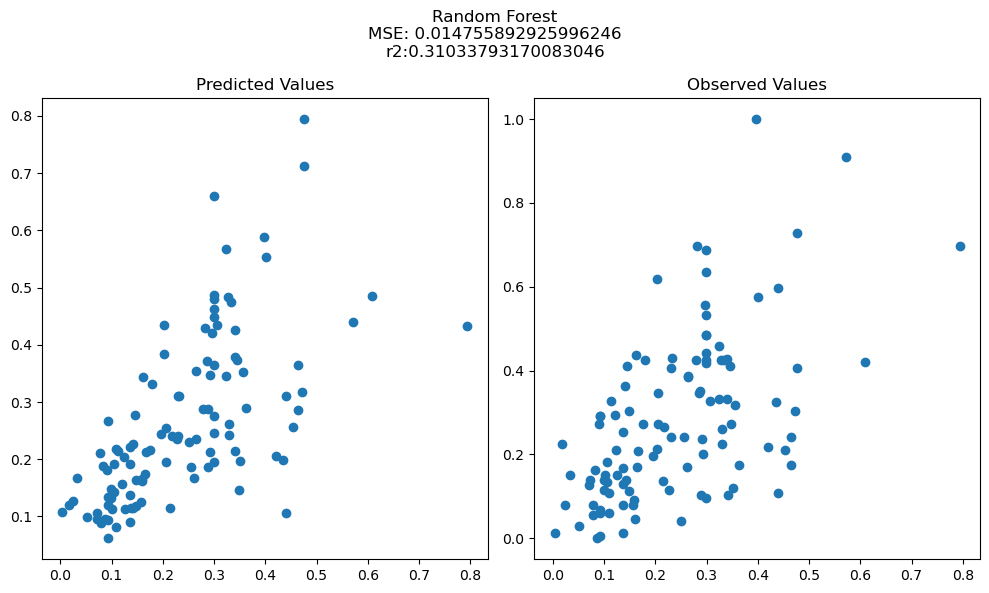

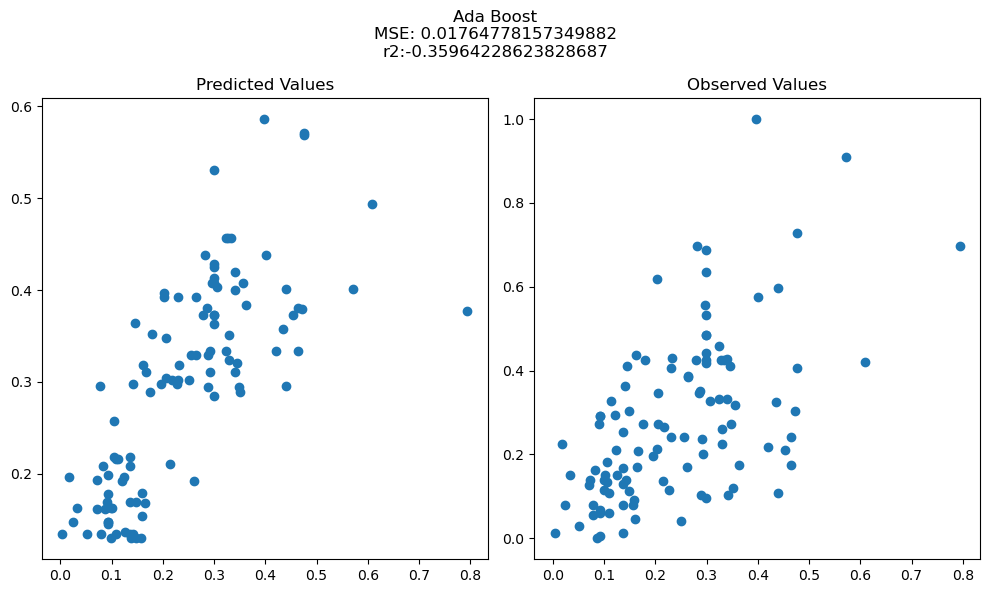

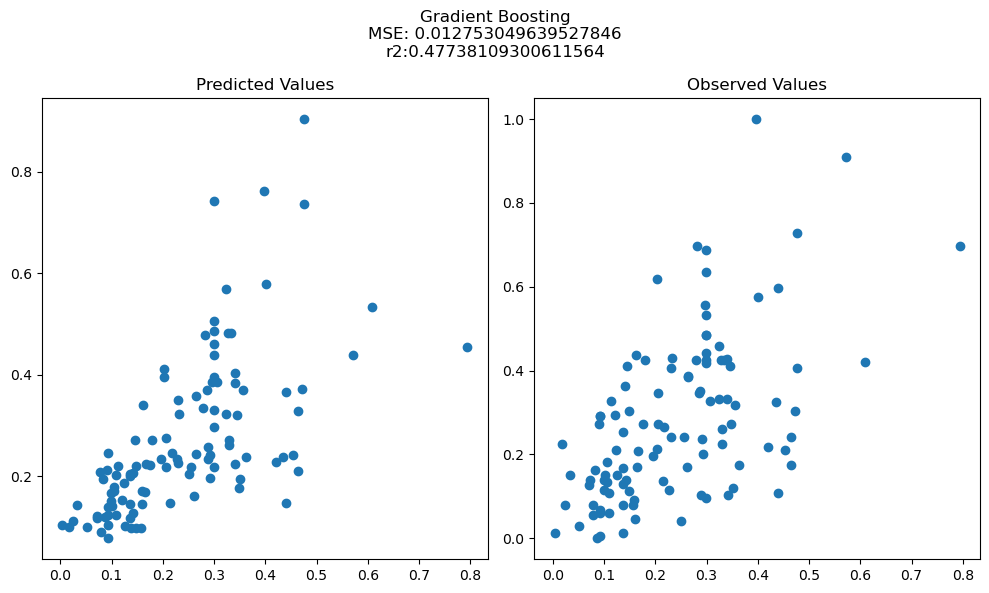

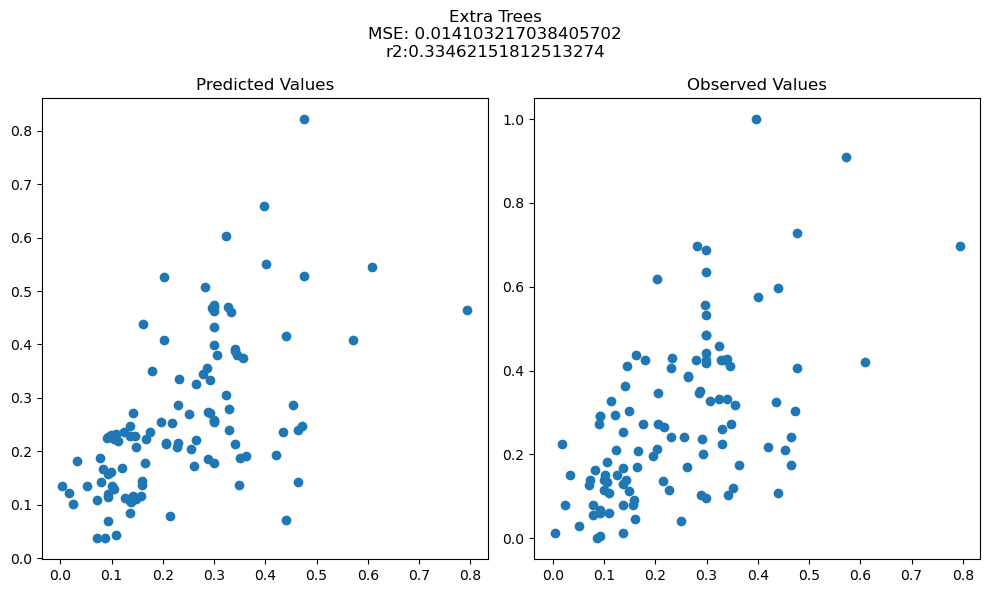

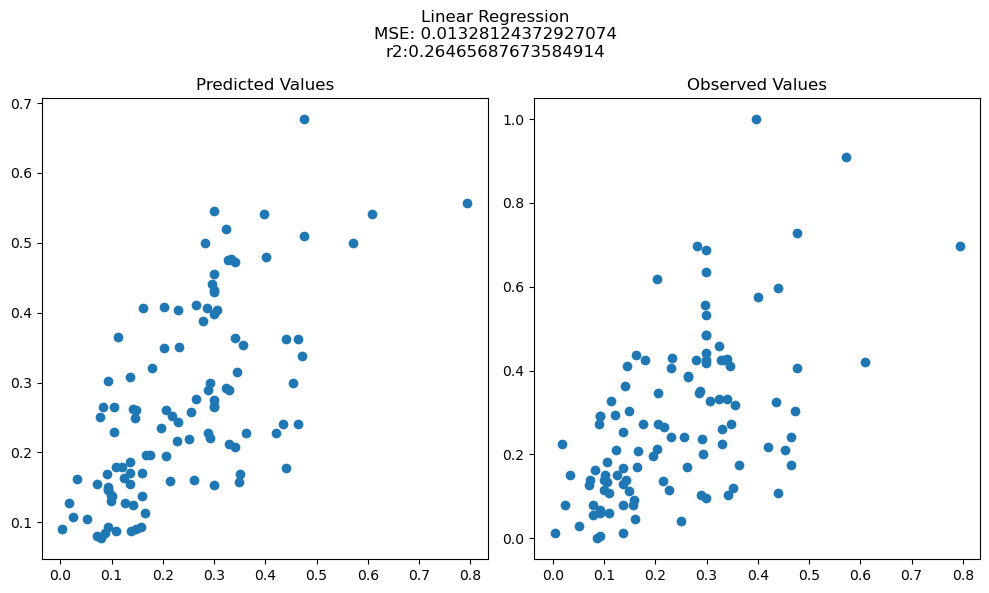

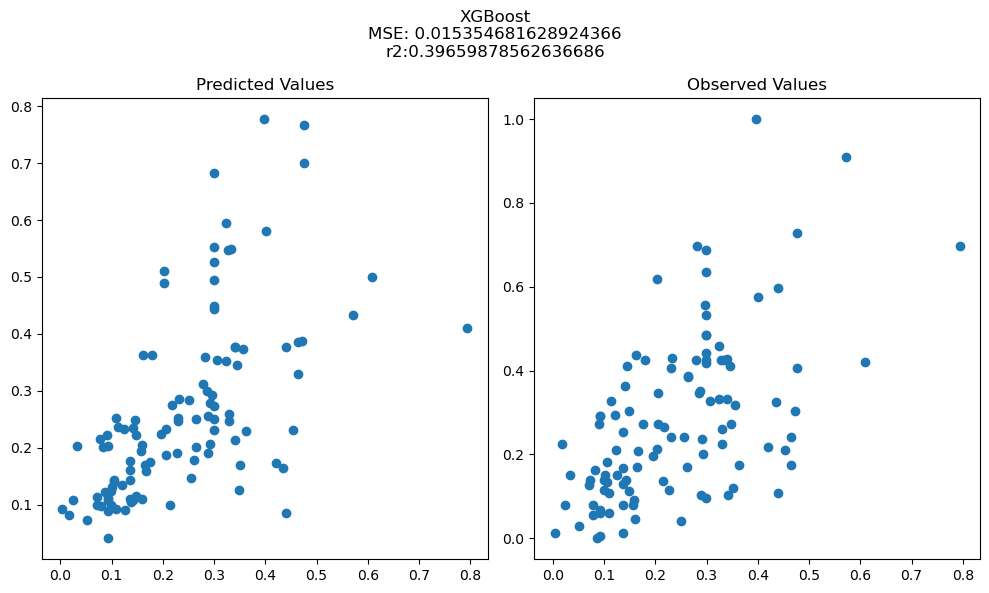

In [28]:
for i, j in zip(models, names):
    training_model(i, j)